<a href="https://colab.research.google.com/github/jhg8342/201732734_Jeonghyungi_AsyncTask/blob/master/financial_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
upload =files.upload()
import io
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


Saving data.csv to data (1).csv


In [ ]:
## 각 엑셀 파일 호출 및 지정

df = pd.read_csv(io.BytesIO(upload['data.csv']),encoding="utf-8")
df.head()


KeyError: ignored

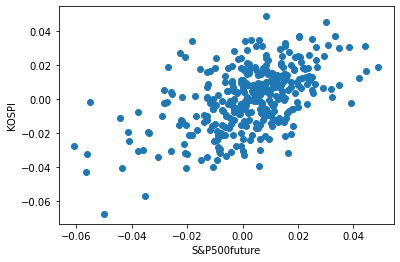

In [ ]:
## 코스피와 코스피 선물간의 상관계수 및 그래프

kospifuture = df["KOSPIfuture"]
kospi = df["KOSPI"]
snpfuture = df["SP500futre"]

# nan 삭제
df.isnull().any()

df = df.dropna(axis=0).reset_index(drop=True)

df.head()

## 그래프 그리기
plt.scatter(snpfuture, kospi)
plt.xlabel('S&P500future')
plt.ylabel('KOSPI')
plt.show()


In [ ]:
x = np.array(kospifuture).reshape(len(kospifuture), 1)
y = np.array(kospi).reshape(len(kospi), 1)

print('x = ', x[:10])
print('x.shape= ', x.shape)
print('\ny = ', y[:10])
print('y.shape= ', y.shape)

x =  [[-0.0174]
 [ 0.0151]
 [ 0.0148]
 [ 0.0408]
 [-0.0031]
 [-0.0088]
 [-0.0281]
 [ 0.016 ]
 [ 0.017 ]
 [ 0.0054]]
x.shape=  (355, 1)

y =  [[-0.0151]
 [-0.0004]
 [ 0.0179]
 [ 0.049 ]
 [-0.0008]
 [-0.0095]
 [-0.0274]
 [ 0.0147]
 [ 0.0169]
 [ 0.0049]]
y.shape=  (355, 1)


In [ ]:
W = 0.0
b = 0.0

n_data = len(x)  # 6
epochs = 5000
learning_rate = 0.1

for i in range(epochs):
    hypothesis = x * W + b
    cost = np.sum((hypothesis - y) ** 2) / n_data
    gradient_w = np.sum((W * x - y + b) * 2 * x) / n_data
    gradient_b = np.sum((W * x - y + b) * 2) / n_data

    W -= learning_rate * gradient_w
    b -= learning_rate * gradient_b

    if i % 100 == 0:
        print('Epoch ({:10d}/{:10d}) cost: {:10f}, W: {:10f}, b:{:10f}'.format(i, epochs, cost, W, b))


Epoch (         0/      5000) cost:   0.000335, W:   0.000066, b:  0.000087
Epoch (       100/      5000) cost:   0.000330, W:   0.006664, b:  0.000431
Epoch (       200/      5000) cost:   0.000326, W:   0.013217, b:  0.000428
Epoch (       300/      5000) cost:   0.000321, W:   0.019725, b:  0.000425
Epoch (       400/      5000) cost:   0.000317, W:   0.026190, b:  0.000422
Epoch (       500/      5000) cost:   0.000313, W:   0.032611, b:  0.000419
Epoch (       600/      5000) cost:   0.000309, W:   0.038989, b:  0.000417
Epoch (       700/      5000) cost:   0.000305, W:   0.045324, b:  0.000414
Epoch (       800/      5000) cost:   0.000301, W:   0.051616, b:  0.000411
Epoch (       900/      5000) cost:   0.000297, W:   0.057866, b:  0.000408
Epoch (      1000/      5000) cost:   0.000293, W:   0.064074, b:  0.000405
Epoch (      1100/      5000) cost:   0.000290, W:   0.070240, b:  0.000403
Epoch (      1200/      5000) cost:   0.000286, W:   0.076364, b:  0.000400
Epoch (     

W:   0.280846
b:   0.000310
result : 
[[-4.57658589e-03]
 [ 4.55090420e-03]
 [ 4.46665045e-03]
 [ 1.17686425e-02]
 [-5.60490250e-04]
 [-2.16131159e-03]
 [-7.58163648e-03]
 [ 4.80366547e-03]
 [ 5.08451132e-03]
 [ 1.82669947e-03]
 [ 4.32622753e-03]
 [ 1.43351528e-03]
 [ 5.39344175e-03]
 [-4.12723253e-03]
 [-4.60467048e-03]
 [ 5.78662594e-03]
 [ 6.17981013e-03]
 [ 7.47170104e-03]
 [ 3.37135164e-03]
 [ 2.86582911e-03]
 [-1.00984361e-03]
 [-8.11524359e-03]
 [-9.37904991e-03]
 [-2.32981910e-03]
 [ 2.05137615e-03]
 [-1.12218195e-03]
 [-3.28469499e-03]
 [ 3.06242120e-03]
 [ 6.29214847e-03]
 [ 2.78157536e-03]
 [ 4.69132713e-03]
 [-1.23452029e-03]
 [ 4.78639392e-04]
 [-7.07611395e-03]
 [-1.15696475e-02]
 [ 2.50072951e-03]
 [-4.40807838e-03]
 [-2.49832661e-03]
 [ 1.71436113e-03]
 [ 1.12631200e-02]
 [-5.78422304e-03]
 [ 2.92199828e-03]
 [ 6.12364096e-03]
 [-8.39608944e-03]
 [-4.46424755e-03]
 [ 4.85983464e-03]
 [ 2.55689868e-03]
 [-4.01489419e-03]
 [ 4.18580460e-03]
 [ 8.11764649e-03]
 [ 7.4436164

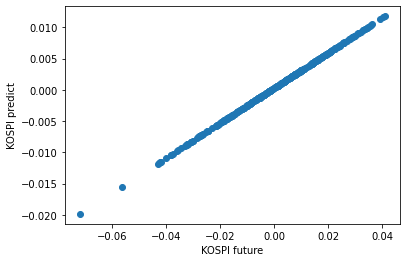

In [ ]:
print('W: {:10f}'.format(W))
print('b: {:10f}'.format(b))
print('result : ')
print(x * W + b)


plt.scatter(kospifuture, x*W + b)
plt.xlabel('KOSPI future')
plt.ylabel('KOSPI predict')
plt.show()

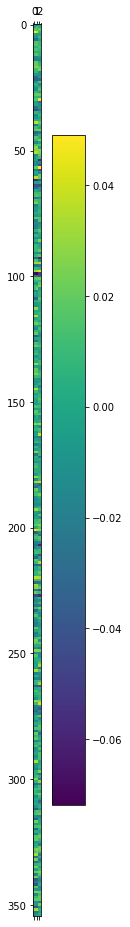

In [ ]:
df.corr()
plt.matshow(arr)
plt.colorbar()
plt.show()
